# Import

In [33]:
from make_dataset import Dataset
from preprocess import *
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
tqdm.pandas(desc="Processing text")

In [36]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: e:\2_LEARNING_BKU\2_File_2\K22_HK242\CO3117_Machine_Learning\Main\src\data


# First Dataset

In [37]:
# Example: Load a CSV file and initialize the Dataset class
file_path = "../../data/raw/kazanova_sentiment140_training.1600000.processed.noemoticon_with_headers.csv"
df = pd.read_csv(file_path, encoding='latin1')
dataset = Dataset(df)

In [38]:
dataset.show_overview()

Dataset Overview:
Number of Rows: 1600000
Number of Columns: 6

Columns:
['target', 'ids', 'date', 'flag', 'user', 'text']

Missing Values:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

Sample Data:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4         

In [39]:
df['text_length'] = df['text'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 1600000/1600000 [00:13<00:00, 120189.54it/s]


In [40]:
dataset.update_dataframe(df)

Updating the dataset...


Plotting distribution for column: target


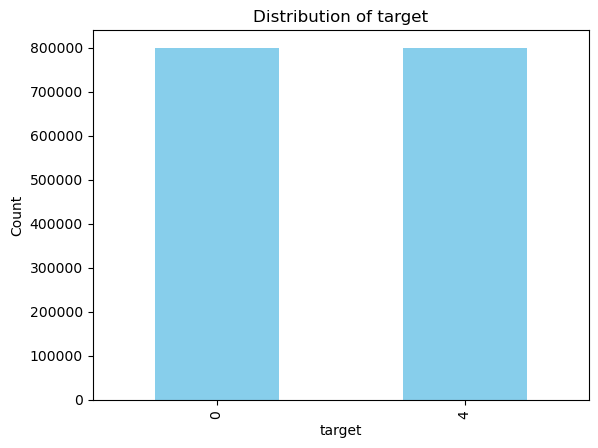

In [41]:
dataset.plot_column_distribution("target")

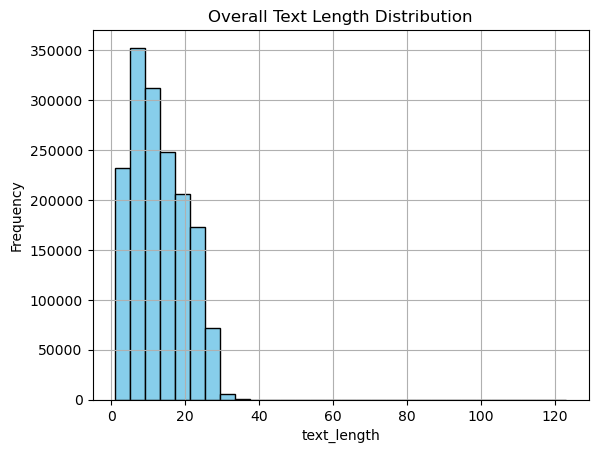

In [42]:
dataset.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

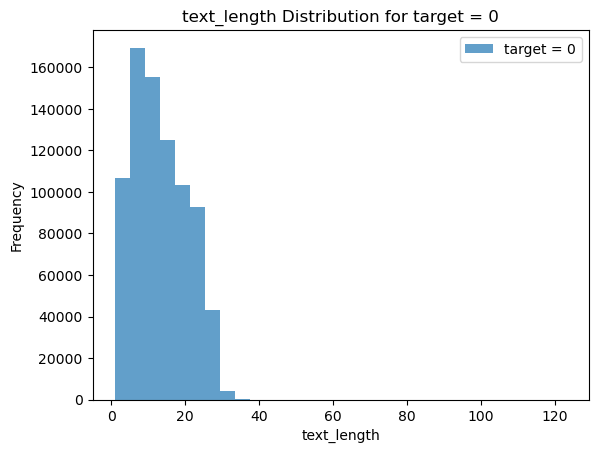

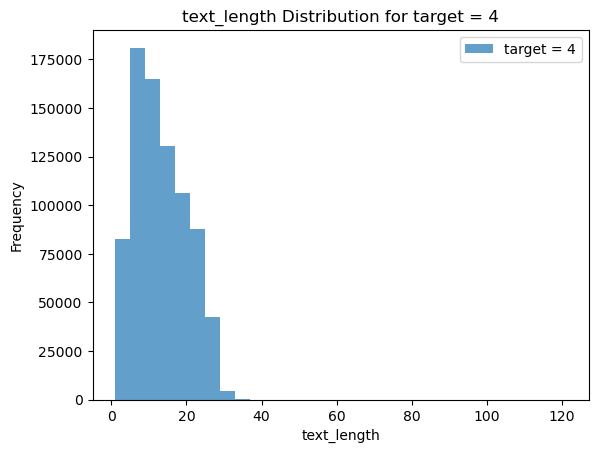

In [43]:
dataset.plot_grouped_histogram('text_length', group_by='target', bins=30)

In [47]:
df['text_clean'] = df['text'].astype(str).progress_apply(lambda x: text_preprocessing(
    text=x,
    remove_special=True,
    to_lowercase=True,
    remove_stopwords_flag=False,
    tokenize_flag=True,
    stem_flag=False,
    lemmatize_flag=True
))


Processing text: 100%|██████████| 1600000/1600000 [20:16<00:00, 1315.75it/s]


In [48]:
df['text_clean_length'] = df['text_clean'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 1600000/1600000 [00:06<00:00, 257844.03it/s]


In [49]:
# Select only the desired columns
df = df[['target', 'text', 'text_clean', 'text_length', 'text_clean_length']]

# Display the updated DataFrame
print(df.head())

   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats a bummer you shoulda got...           19   
1  is upset that he cant update his facebook by t...           21   
2  kenichan i dived many time for the ball manage...           18   
3       my whole body feel itchy and like it on fire           10   
4  nationwideclass no it not behaving at all im m...           21   

   text_clean_length  
0                 17  
1                 21  
2                 17  
3                 10  
4                 21  


In [50]:
dataset.update_dataframe(df)

Updating the dataset...


In [51]:
dataset.show_overview()

Dataset Overview:
Number of Rows: 1600000
Number of Columns: 5

Columns:
['target', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
target               0
text                 0
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats a bummer you shoulda got...           19   
1  is upset that he cant update his facebook by t...           21   
2  kenichan i dived many time for the ball manage...           18   
3       my whole body feel itchy and l

In [ ]:
print("\nDataFrame with Cleaned Text:")
print(df.head())

df.to_csv("../../data/processed/df1_with_text_clean.csv", index=False)


DataFrame with Cleaned Text:
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats a bummer you shoulda got...           19   
1  is upset that he cant update his facebook by t...           21   
2  kenichan i dived many time for the ball manage...           18   
3       my whole body feel itchy and like it on fire           10   
4  nationwideclass no it not behaving at all im m...           21   

   text_clean_length  
0                 17  
1                 21  
2                 17  
3                 10  
4                 21  


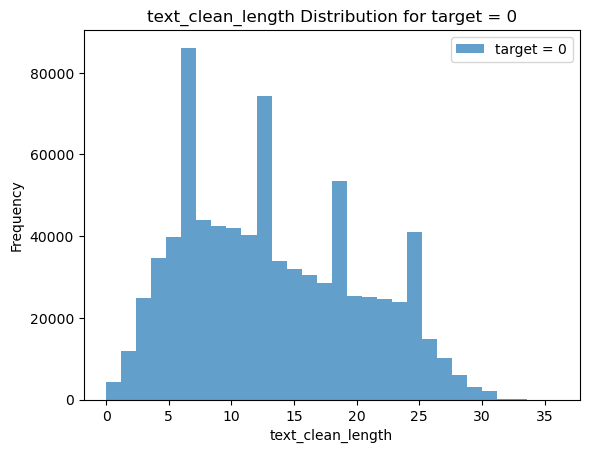

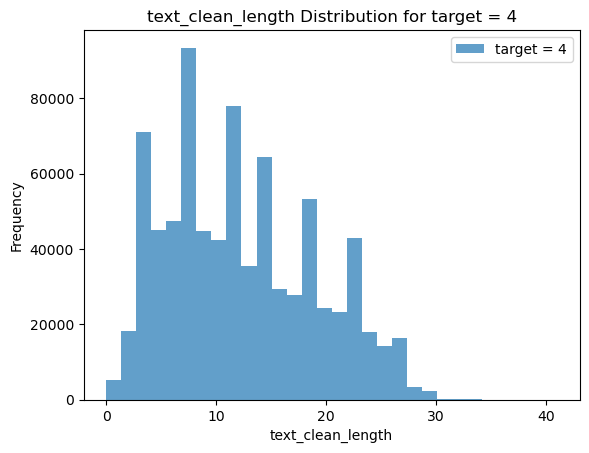

In [53]:
dataset.plot_grouped_histogram('text_clean_length', group_by='target', bins=30)

# Second Dataset

In [63]:
# Example: Load a CSV file and initialize the Dataset class
file_path2 = "../../data/raw/yasserh_twitter-tweets-sentiment-dataset_Tweets_with_headers.csv"
df2 = pd.read_csv(file_path2, encoding='latin1')
dataset2 = Dataset(df2)

In [64]:
dataset2.show_overview()

Dataset Overview:
Number of Rows: 27481
Number of Columns: 4

Columns:
['textID', 'text', 'selected_text', 'sentiment']

Missing Values:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Sample Data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [65]:
df2['text_length'] = df2['text'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 27481/27481 [00:00<00:00, 82906.56it/s]


In [66]:
dataset2.update_dataframe(df2)

Updating the dataset...


Plotting distribution for column: sentiment


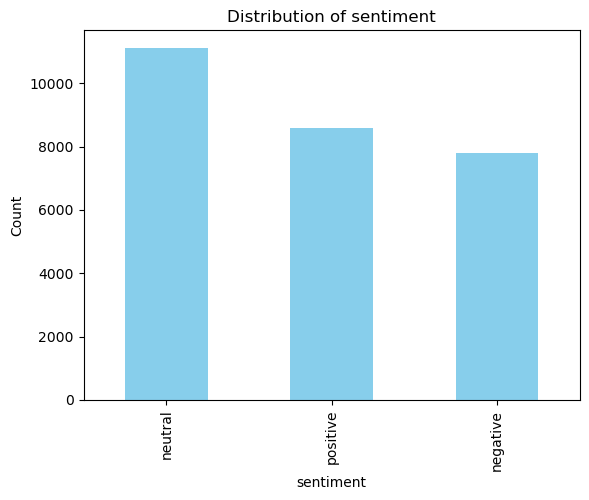

In [67]:
dataset2.plot_column_distribution("sentiment")

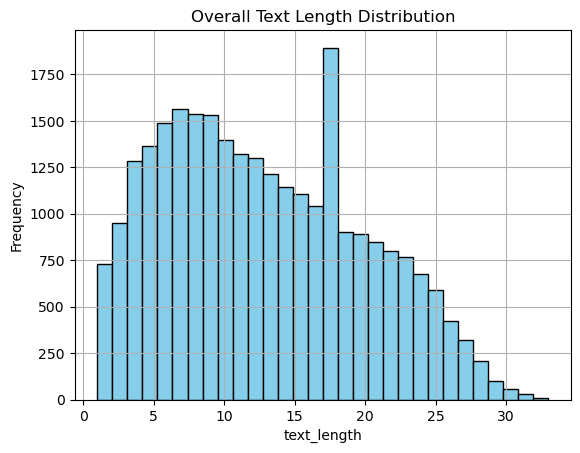

In [68]:
dataset2.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

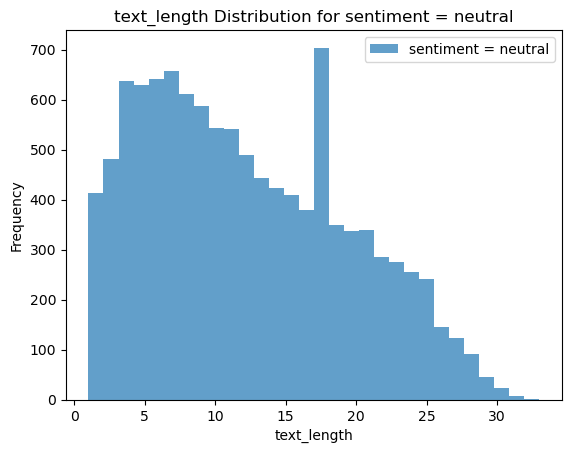

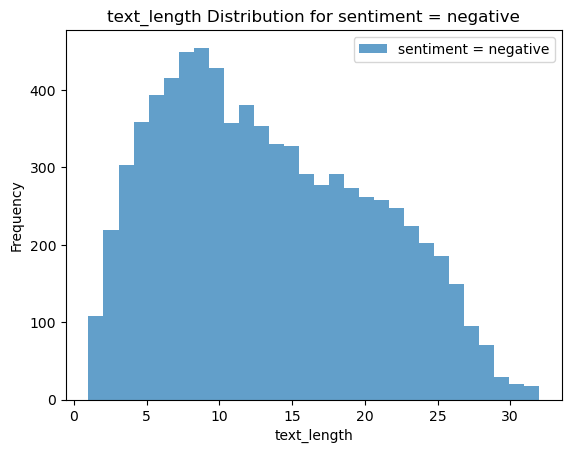

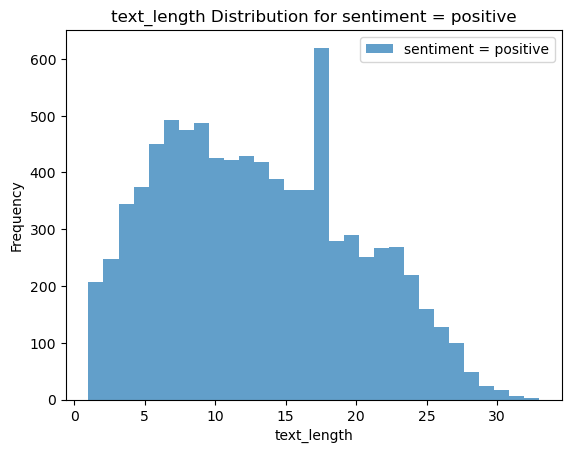

In [70]:
dataset2.plot_grouped_histogram('text_length', group_by='sentiment', bins=30)

In [71]:
df2['text_clean'] = df2['text'].astype(str).progress_apply(lambda x: text_preprocessing(
    text=x,
    remove_special=True,
    to_lowercase=True,
    remove_stopwords_flag=False,
    tokenize_flag=True,
    stem_flag=False,
    lemmatize_flag=True
))


Processing text: 100%|██████████| 27481/27481 [00:47<00:00, 573.51it/s]


In [72]:
df2['text_clean_length'] = df2['text_clean'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 27481/27481 [00:00<00:00, 92840.69it/s]


In [73]:
df2.head()

,textID,text,selected_text,sentiment,text_length,text_clean,text_clean_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,id have responded if i were going,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,sooo sad i will miss you here in san diego,10
2,088c60f138,my boss is bullying me...,bullying me,negative,5,my bos is bullying me,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,what interview leave me alone,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,son of why couldnt they put them on the releas...,13


In [74]:
# Select only the desired columns
df2 = df2[['sentiment', 'text', 'text_clean', 'text_length', 'text_clean_length']]

# Display the updated DataFrame
print(df2.head())

  sentiment                                               text  \
0   neutral                I`d have responded, if I were going   
1  negative      Sooo SAD I will miss you here in San Diego!!!   
2  negative                          my boss is bullying me...   
3  negative                     what interview! leave me alone   
4  negative   Sons of ****, why couldn`t they put them on t...   

                                          text_clean  text_length  \
0                  id have responded if i were going            7   
1        sooo sad i will miss you here in san diego            10   
2                              my bos is bullying me            5   
3                      what interview leave me alone            5   
4  son of why couldnt they put them on the releas...           14   

   text_clean_length  
0                  7  
1                 10  
2                  5  
3                  5  
4                 13  


In [75]:
dataset2.update_dataframe(df2)

Updating the dataset...


In [76]:
dataset2.show_overview()

Dataset Overview:
Number of Rows: 27481
Number of Columns: 5

Columns:
['sentiment', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
sentiment            0
text                 1
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
  sentiment                                               text  \
0   neutral                I`d have responded, if I were going   
1  negative      Sooo SAD I will miss you here in San Diego!!!   
2  negative                          my boss is bullying me...   
3  negative                     what interview! leave me alone   
4  negative   Sons of ****, why couldn`t they put them on t...   

                                          text_clean  text_length  \
0                  id have responded if i were going            7   
1        sooo sad i will miss you here in san diego            10   
2                              my bos is bullying me            5   
3                      wh

In [77]:
# Rename the sentiment column to target
df2.rename(columns={"sentiment": "target"}, inplace=True)

# Map sentiment values to numerical values
sentiment_mapping = {
    "negative": 0,
    "neutral": 2,
    "positive": 4
}
df2["target"] = df2["target"].map(sentiment_mapping)

In [78]:
df2.head()

,target,text,text_clean,text_length,text_clean_length
0,2,"I`d have responded, if I were going",id have responded if i were going,7,7
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego,10,10
2,0,my boss is bullying me...,my bos is bullying me,5,5
3,0,what interview! leave me alone,what interview leave me alone,5,5
4,0,"Sons of ****, why couldn`t they put them on t...",son of why couldnt they put them on the releas...,14,13


In [ ]:
print("\nDataFrame with Cleaned Text:")
print(df2.head())

df2.to_csv("../../data/processed/df2_with_text_clean.csv", index=False)


DataFrame with Cleaned Text:
   target                                               text  \
0       2                I`d have responded, if I were going   
1       0      Sooo SAD I will miss you here in San Diego!!!   
2       0                          my boss is bullying me...   
3       0                     what interview! leave me alone   
4       0   Sons of ****, why couldn`t they put them on t...   

                                          text_clean  text_length  \
0                  id have responded if i were going            7   
1        sooo sad i will miss you here in san diego            10   
2                              my bos is bullying me            5   
3                      what interview leave me alone            5   
4  son of why couldnt they put them on the releas...           14   

   text_clean_length  
0                  7  
1                 10  
2                  5  
3                  5  
4                 13  


# Merge dataset

In [ ]:
path1 = "../../data/processed/df1_with_text_clean.csv"
path2 = "../../data/processed/df2_with_text_clean.csv"

In [82]:
df1 = pd.read_csv(path1, encoding='latin1')
df1.head()

,target,text,text_clean,text_length,text_clean_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda got...,19,17
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,21,21
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many time for the ball manage...,18,17
3,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,10,10
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it not behaving at all im m...,21,21


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   target             1600000 non-null  int64 
 1   text               1600000 non-null  object
 2   text_clean         1599575 non-null  object
 3   text_length        1600000 non-null  int64 
 4   text_clean_length  1600000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 61.0+ MB


In [85]:
# Filter the DataFrame for rows where text_clean is null
rows_with_null_text_clean = df1[df1['text_clean'].isnull()]

# Display the rows
print(rows_with_null_text_clean)

         target                                              text text_clean  \
13232         0                                         @ASOT400         NaN   
16803         0                                        @Author82         NaN   
37614         0                                   @Eternity87            NaN   
39345         0                                        @easy1126         NaN   
45054         0                                        @Rove1974         NaN   
...         ...                                               ...        ...   
1574185       4                                  @felicity_aug20         NaN   
1580801       4  ...............myspace.com/laceylynnwilliams98          NaN   
1597326       4                                    @ashtonshay00         NaN   
1597684       4          @patty4sound http://twitpic.com/7iuns -         NaN   
1599494       4                                  @Sworn4DaBosses         NaN   

         text_length  text_clean_length

In [83]:
df2 = pd.read_csv(path2, encoding='latin1')
df2.head()

,target,text,text_clean,text_length,text_clean_length
0,2,"I`d have responded, if I were going",id have responded if i were going,7,7
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego,10,10
2,0,my boss is bullying me...,my bos is bullying me,5,5
3,0,what interview! leave me alone,what interview leave me alone,5,5
4,0,"Sons of ****, why couldn`t they put them on t...",son of why couldnt they put them on the releas...,14,13


In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   target             27481 non-null  int64 
 1   text               27480 non-null  object
 2   text_clean         27476 non-null  object
 3   text_length        27481 non-null  int64 
 4   text_clean_length  27481 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB


In [ ]:
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627481 entries, 0 to 1627480
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   target             1627481 non-null  int64 
 1   text               1627480 non-null  object
 2   text_clean         1627051 non-null  object
 3   text_length        1627481 non-null  int64 
 4   text_clean_length  1627481 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 62.1+ MB
None


In [88]:
merged_df.head()

,target,text,text_clean,text_length,text_clean_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda got...,19,17
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,21,21
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many time for the ball manage...,18,17
3,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,10,10
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no it not behaving at all im m...,21,21


In [90]:
merged_df = merged_df.dropna(subset=['text', 'text_clean'])
merged_df = merged_df.drop_duplicates()

In [91]:
dataset_merged = Dataset(merged_df)
dataset_merged.show_overview()

Dataset Overview:
Number of Rows: 1609685
Number of Columns: 5

Columns:
['target', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
target               0
text                 0
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats a bummer you shoulda got...           19   
1  is upset that he cant update his facebook by t...           21   
2  kenichan i dived many time for the ball manage...           18   
3       my whole body feel itchy and l

Plotting distribution for column: target


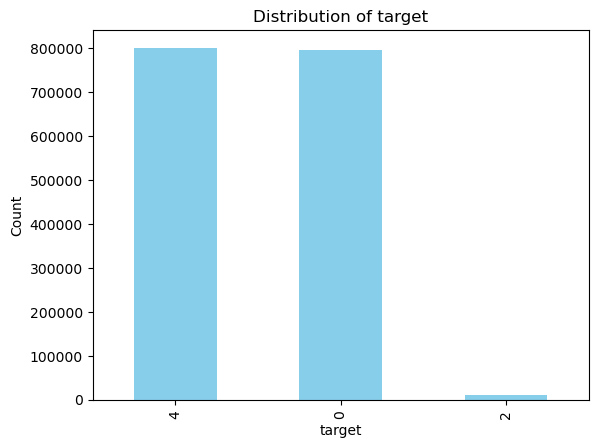

In [92]:
dataset_merged.plot_column_distribution("target")

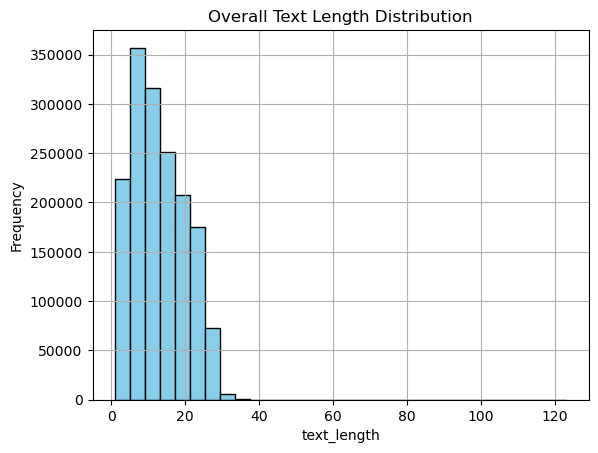

In [93]:
dataset_merged.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

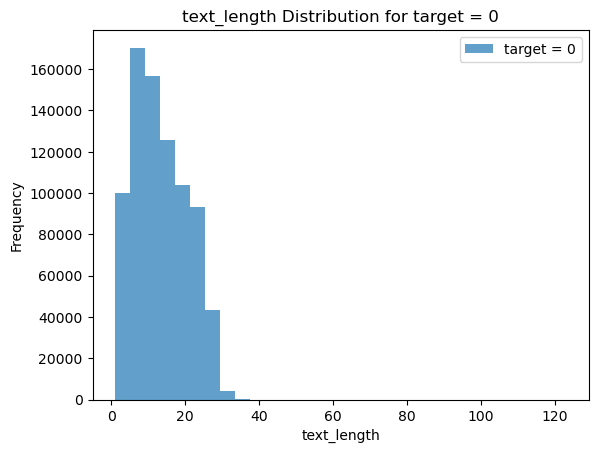

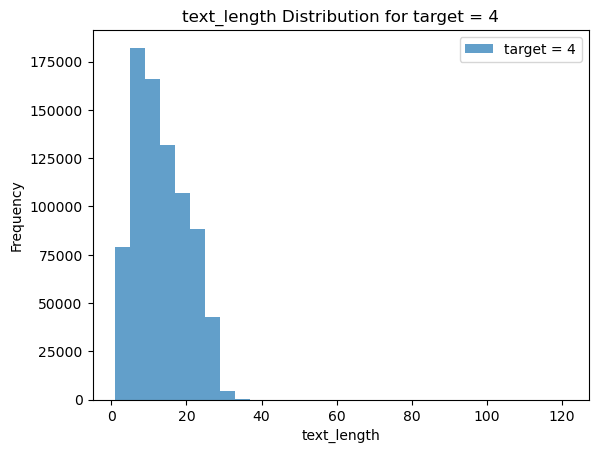

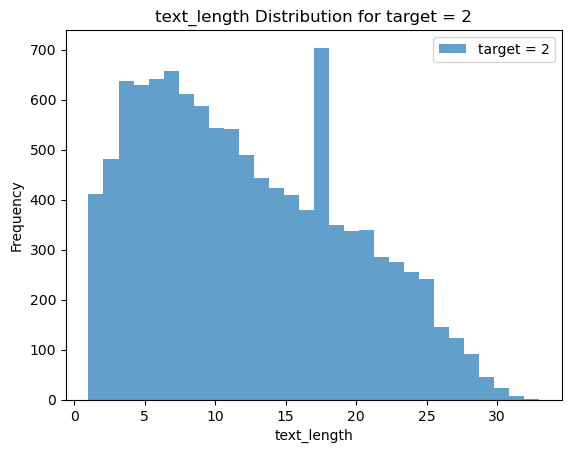

In [95]:
dataset_merged.plot_grouped_histogram('text_length', group_by='target', bins=30)

In [ ]:
# Save the full cleaned dataset to 'final_clean.csv'
merged_df.to_csv("../../data/final/final_clean.csv", index=False)
print("Full dataset saved as 'final_clean.csv'.")

# Filter out rows where 'target' is 2
merged_df_no_neutral = merged_df[merged_df['target'] != 2]
merged_df_no_neutral.to_csv("../../data/final/final_clean_no_neutral.csv", index=False)
print("Dataset without neutral rows saved as 'final_clean_no_neutral.csv'.")


Full dataset saved as 'final_clean.csv'.
Dataset without neutral rows saved as 'final_clean_no_neutral.csv'.
